In [106]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [9]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

mean = np.mean(speed)  
median = np.median(speed)
mode = stats.mode(speed)

print(f'Mean is {mean}, Median is {median}, Mode is {mode.mode}')

standard_deviation = np.std(speed)
variance = np.var(speed)

print(f'Standard Deviation is {standard_deviation}, Variance is {variance}')

Mean is 89.76923076923077, Median is 87.0, Mode is 86
Standard Deviation is 9.258292301032677, Variance is 85.71597633136093


In [10]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

percentile_25 = np.percentile(ages, 25)
percentile_50 = np.percentile(ages, 50)
percentile_75 = np.percentile(ages, 75)

print(f'25 Percentile is {percentile_25}, 50 Percentile is {percentile_50}, 75 Percentile is {percentile_75}')


25 Percentile is 11.0, 50 Percentile is 31.0, 75 Percentile is 43.0


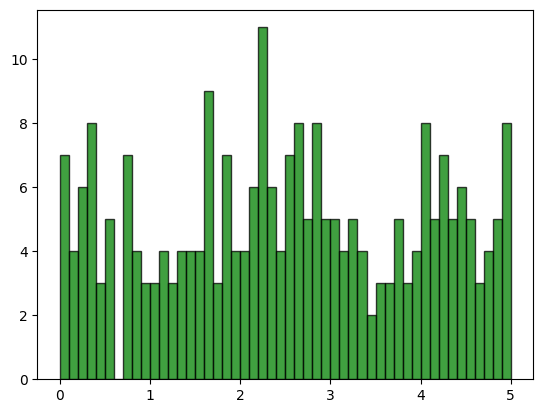

In [20]:
x = np.random.uniform(0.0, 5.0, 250)

plt.hist(x, 50, facecolor='g', alpha=0.75, label='Histogram', edgecolor='black')
plt.show()

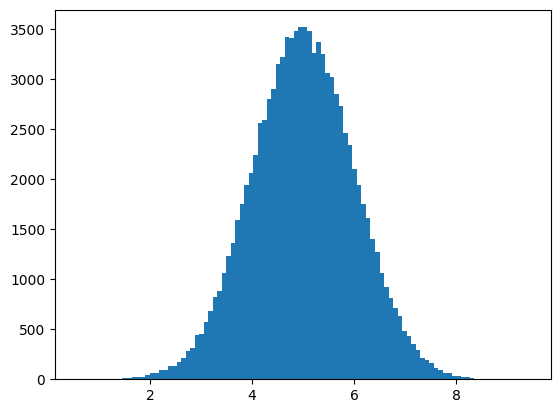

In [21]:
x = np.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

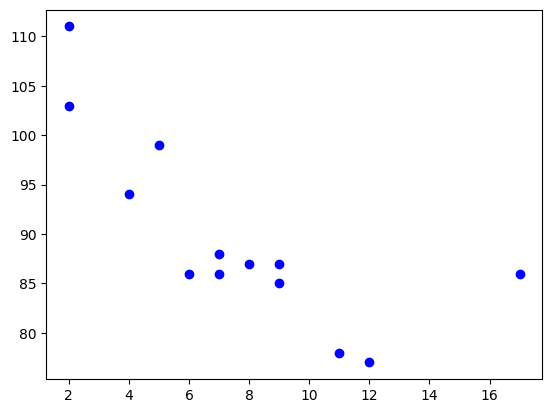

In [25]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y, color='blue')
plt.show()

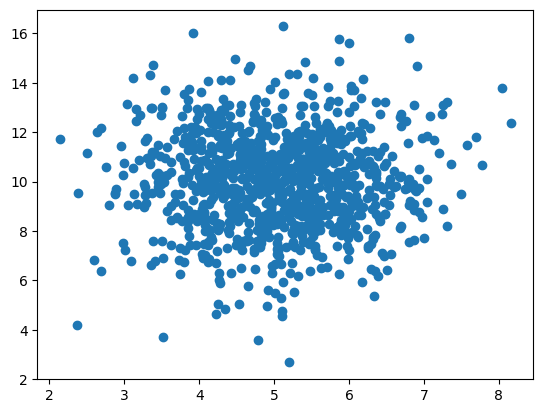

In [27]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

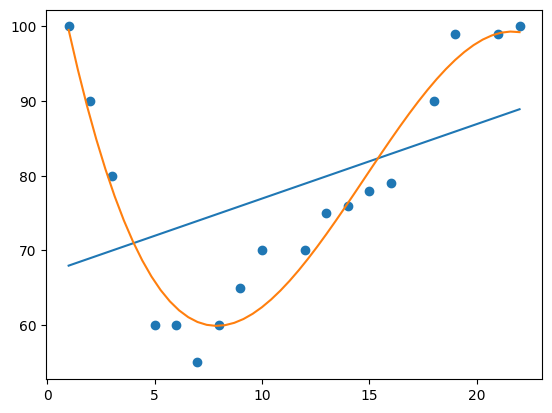

In [49]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def lr(x):
  return slope * x + intercept

linear_model = list(map(lr, x))
poly_model = np.poly1d(np.polyfit(x, y, 3))
poly_line = np.linspace(1, 22, 50)
plt.scatter(x, y)
plt.plot(x, linear_model)
plt.plot(poly_line, poly_model(poly_line))

plt.show()

In [51]:
speed = poly_model(17)
print(speed)

88.87331269698001


In [68]:
df = pd.read_csv("data.csv")

df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [54]:
X = df[['Weight', 'Volume']]
y = df['CO2']

In [56]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [59]:
predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)

[107.2087328]


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
print(regr.coef_)

[0.00755095 0.00780526]


In [69]:
scale = StandardScaler()
df = pd.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [67]:
df = pd.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


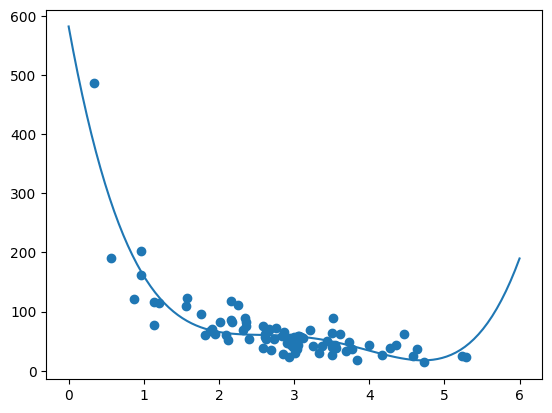

In [70]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [72]:
r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629797


In [80]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.6210794247283533


In [81]:
print(mymodel(1))

136.77738976244802


In [83]:
df = pd.read_csv("dtdata.csv")
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [84]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [85]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Experience <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

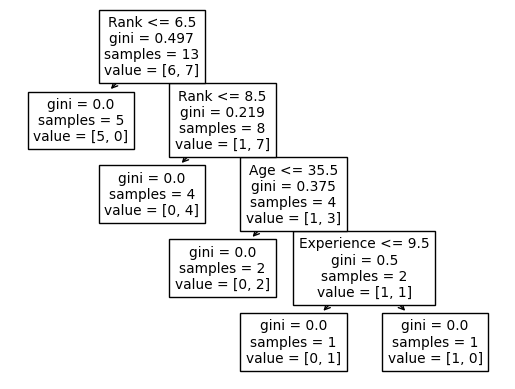

In [87]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [89]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [97]:
confusion_matrixx = confusion_matrix(actual, predicted)

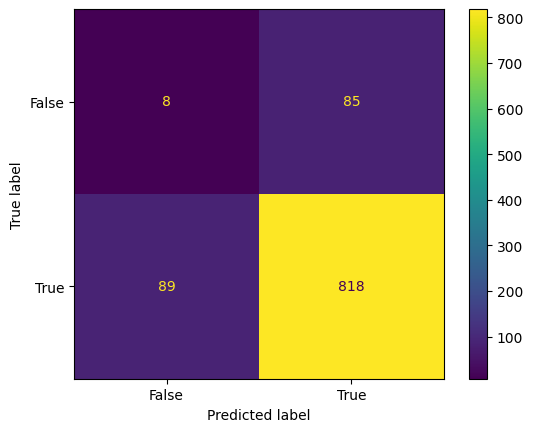

In [98]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrixx, display_labels = [False, True])

cm_display.plot()
plt.show()

In [104]:
Accuracy = accuracy_score(actual, predicted)
Percision = precision_score(actual, predicted)
Recall = recall_score(actual, predicted)
F1_score = f1_score(actual, predicted)
Accuracy, Percision, Recall, F1_score

(0.826, 0.9058693244739756, 0.9018743109151047, 0.9038674033149171)

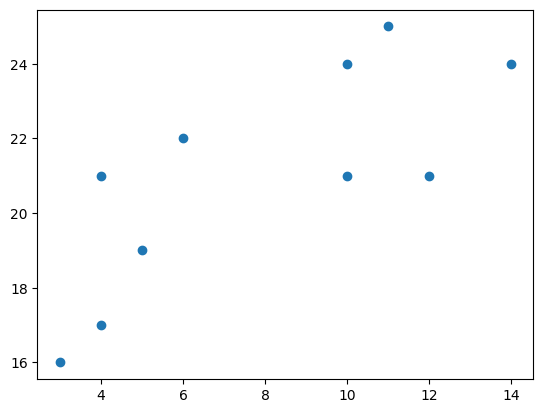

In [105]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

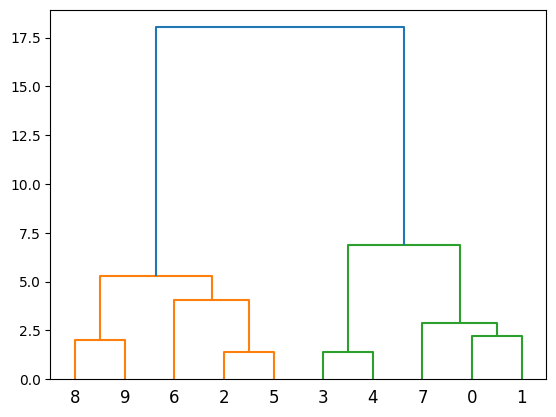

In [107]:
data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()